# K-Nearest-Neighbors Project
## Using anonymous data.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# Loading the data as a Data-Frame.
df = pd.read_csv("KNN_Project_Data")

In [3]:
# Chceking the basic information about the data.
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


### Exploratory Data Analysis

<AxesSubplot:xlabel='TARGET CLASS', ylabel='count'>

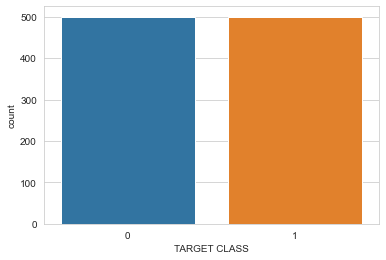

In [6]:
sns.countplot(df['TARGET CLASS'])

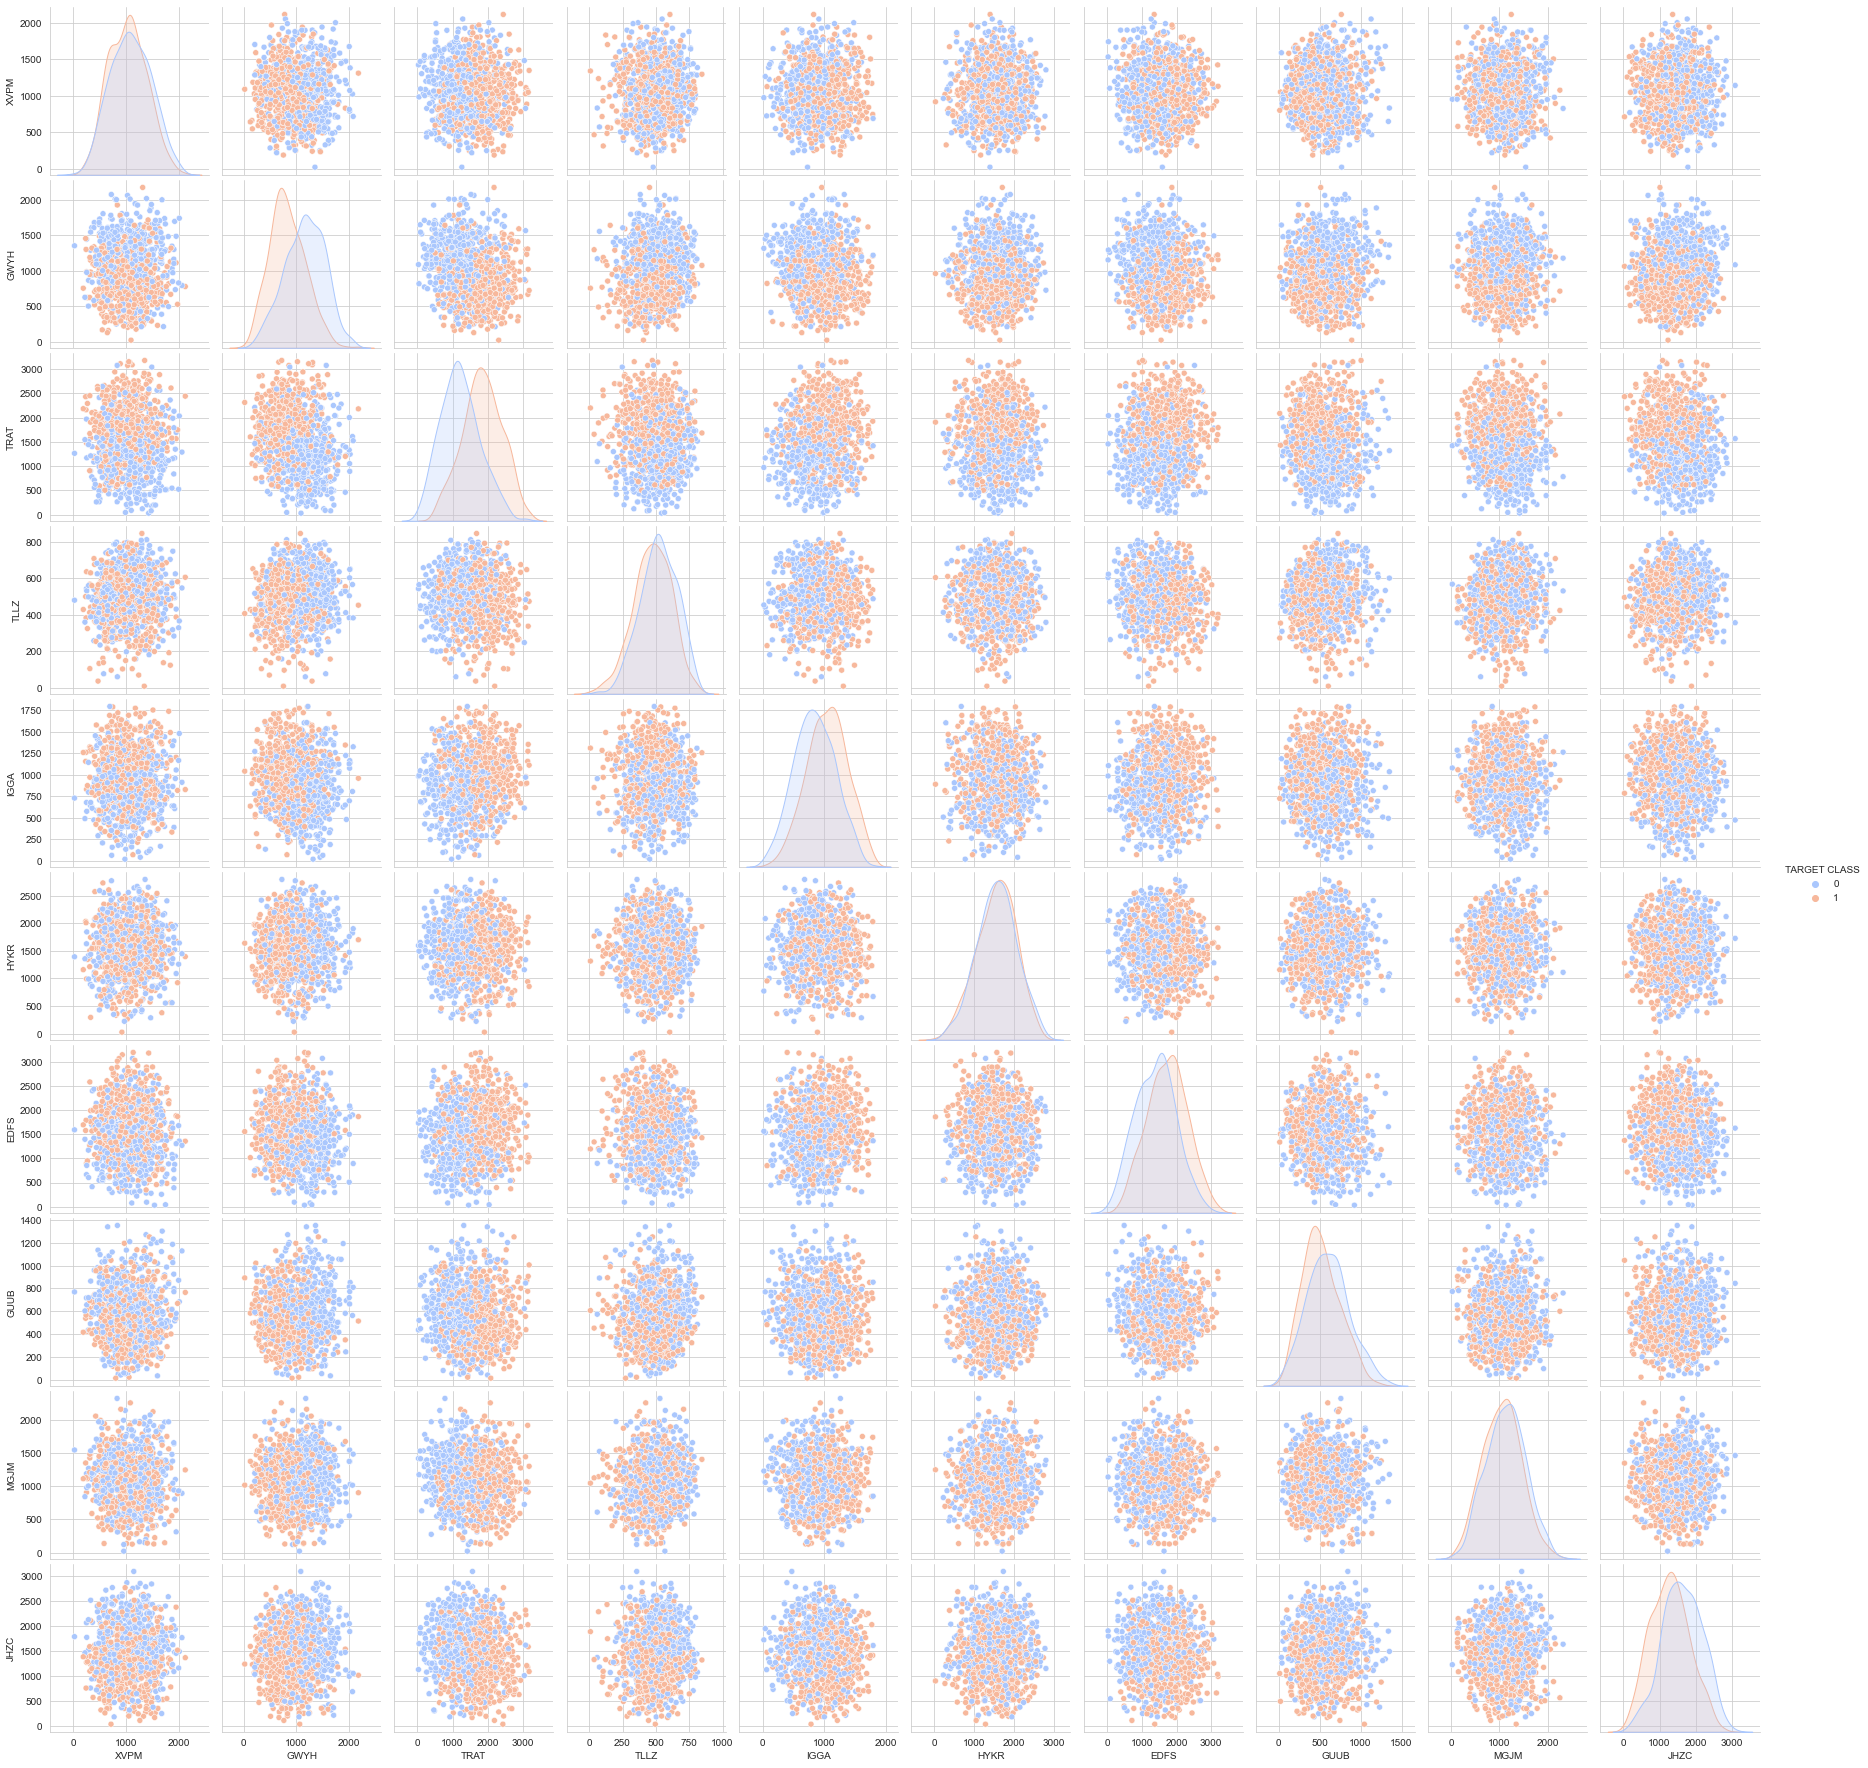

In [7]:
sns.pairplot(df, hue = 'TARGET CLASS', palette = 'coolwarm')

In [8]:
# Scaling the features using Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('TARGET CLASS', axis = 1))
X = pd.DataFrame(X, columns=df.drop('TARGET CLASS', axis = 1).columns)

In [9]:
y = df['TARGET CLASS']

### Model Building

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [11]:
kmodel = KNeighborsClassifier(n_neighbors=4)
kmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
predictions = kmodel.predict(X_test)

In [13]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[86 13]
 [28 73]]


              precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.85      0.72      0.78       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



## Elbow-curve used to determine better value for 'n_neighbors'

In [14]:
error = []

for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error.append(np.mean(pred != y_test))

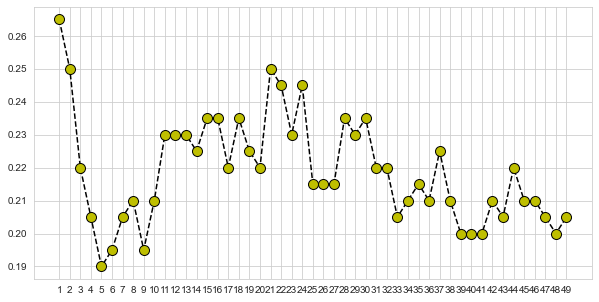

In [15]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(range(1,50), error, color = 'black', ls='--', marker = 'o', markerfacecolor = 'y', markersize = 10)
plt.xticks(np.arange(1,50))
plt.show()

### We see that n_neighbors = 5 gives least error.

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [17]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('Accuracy: ', accuracy_score(y_test, pred))

[[80 19]
 [19 82]]


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.81      0.81      0.81       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Accuracy:  0.81
